In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("bank.csv") #https://www.google.com/url?q=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Fjaniobachmann%2Fbank-marketing-dataset%2F

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [8]:
df.shape

(11162, 17)

In [9]:
#unique values in taget column
df['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

In [10]:
df.describe(include = ["object"])

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


In [11]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [12]:
#Extracting categorical and Numerical columns
categorical_cols = [col for col in df.columns if df[col].dtypes == 'object']
numerical_cols = [col for col in df.columns if df[col].dtypes!= 'object']

In [13]:
#printing categorical columns
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

In [14]:
#printing numerical columns
numerical_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [15]:
#checking for unique vales in categorical_columns
for col in df:
  print(f'{col}: has {df[col].unique()}values')

age: has [59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]values
job: has ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']values
marital: has ['married' 'single' 'divorced']values
education: has ['secondary' 'tertiary' 'primary' 'unknown']values
default: has ['no' 'yes']values
balance: has [2343   45 1270 ... 1594 2593 -134]values
housing: has ['yes' 'no']values
loan: has ['no' 'yes']values
contact: has ['unknown' 'cellular' 'telephone']values
day: has [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31]values
month: has ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']values
duration: has [1042 1467 1389 ... 1504  818 1812]values
campaign: 

In [16]:
#converting target column 'Deposit' into 0(yes) and 1 (no)
df['deposit']= df['deposit'].map({'yes':0, 'no': 1})

Axes(0.125,0.11;0.775x0.77)


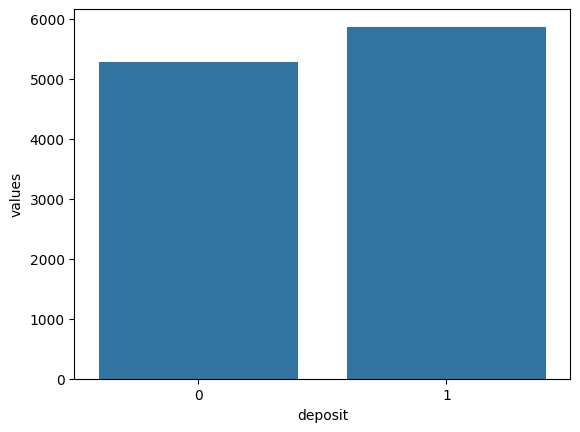

In [17]:
#distribution of deposit(target variable)
temp = df['deposit'].value_counts()
temp_df = pd.DataFrame({'deposit': temp.index, 'values': temp.values})
print(sns.barplot(x = 'deposit', y = 'values', data =temp_df))

In [18]:
#Fill numerical columns with the median
for col in numerical_cols:
    df[col]=df[col].fillna(df[col].median())

In [19]:
#Fill categorical columns with the mode
for col in categorical_cols:
    df[col]=df[col].fillna(df[col].mode()[0])

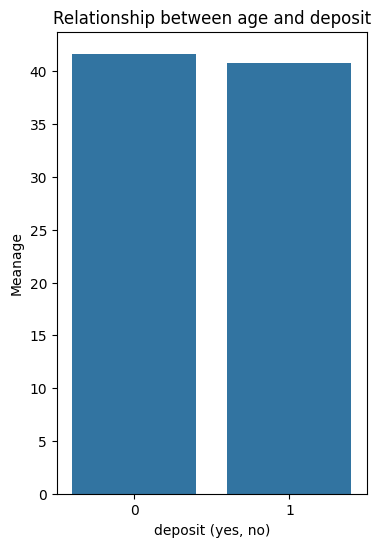

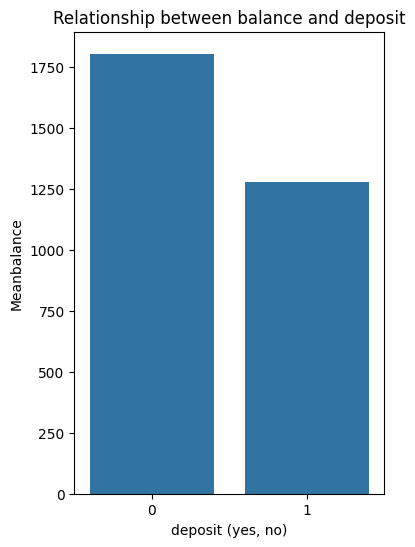

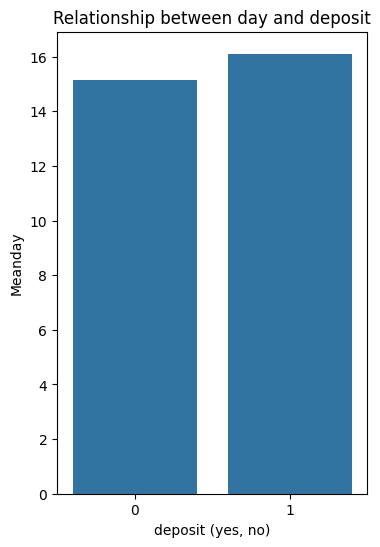

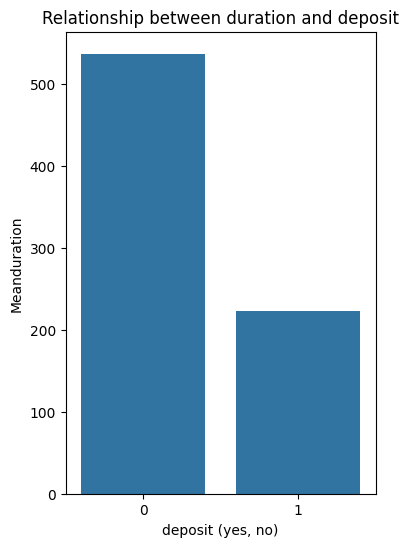

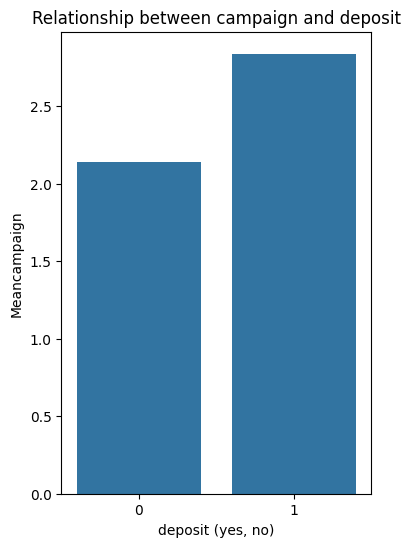

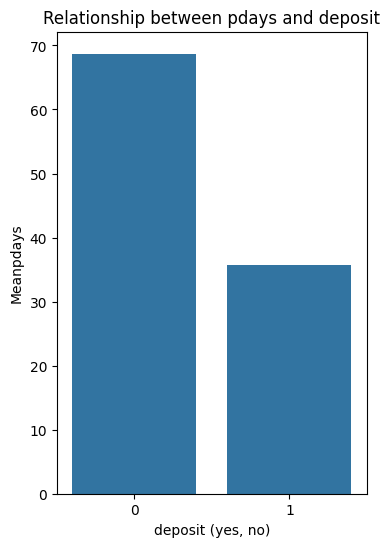

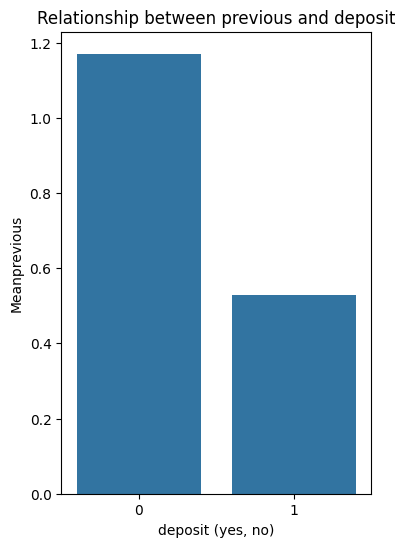

In [20]:
#Lets see the relationship between numerical_columns and classification(deposit)
for col in numerical_cols:
  plt.figure(figsize=(4,6))
  #calculate mean of the numberical column for each class
  deposit_means= df.groupby('deposit')[col].mean()

  #calculating bar plots using seaborn
  sns.barplot(x= deposit_means.index, y= deposit_means.values)

  plt.title(f'Relationship between {col} and deposit')
  plt.xlabel('deposit (yes, no)')
  plt.ylabel(f'Mean{col}')
  plt.show()

In [21]:
#Continous and Discrete variable
discrete_feature =[feature for feature in numerical_cols if len(df[feature].unique())<25]
print("Discrete Variables count: {}".format(len(discrete_feature)))

Discrete Variables count: 0


In [22]:
#Continous variable
continuous_feature=[feature for feature in numerical_cols if feature not in discrete_feature]
print("Continous feature count {}".format(len(continuous_feature)))

Continous feature count 7


In [23]:
continuous_feature

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

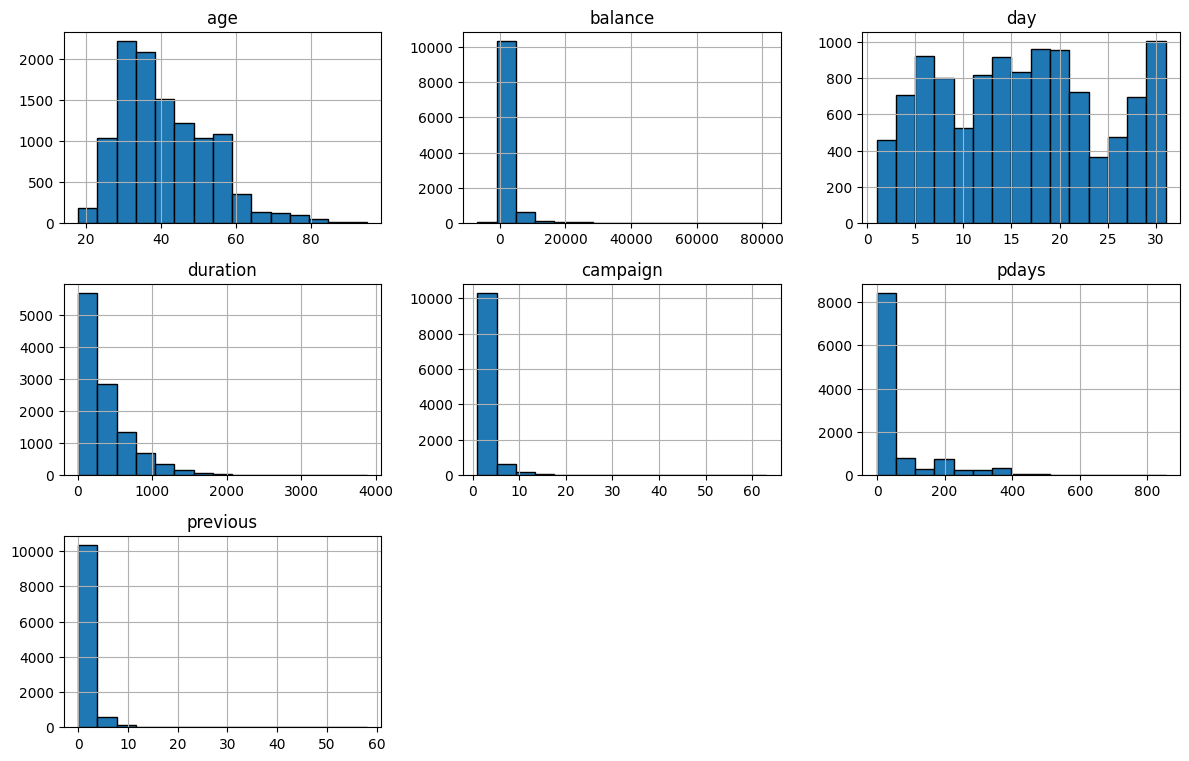

In [24]:
#Distribution of numerical columns
df[numerical_cols].hist(figsize=(12,10), bins=15, layout=(4,3), edgecolor='black')
plt.tight_layout()
plt.show()

In [25]:
#checking skewness of numerical columns
skewness =df[numerical_cols].skew()
print(skewness)

age         0.862780
balance     8.224619
day         0.111330
duration    2.143695
campaign    5.545578
pdays       2.449986
previous    7.335298
dtype: float64


In [26]:
df[['age','balance','day','duration','campaign','pdays', 'previous']]

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0
...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0
11158,39,733,16,83,4,-1,0
11159,32,29,19,156,2,-1,0
11160,43,0,8,9,2,172,5


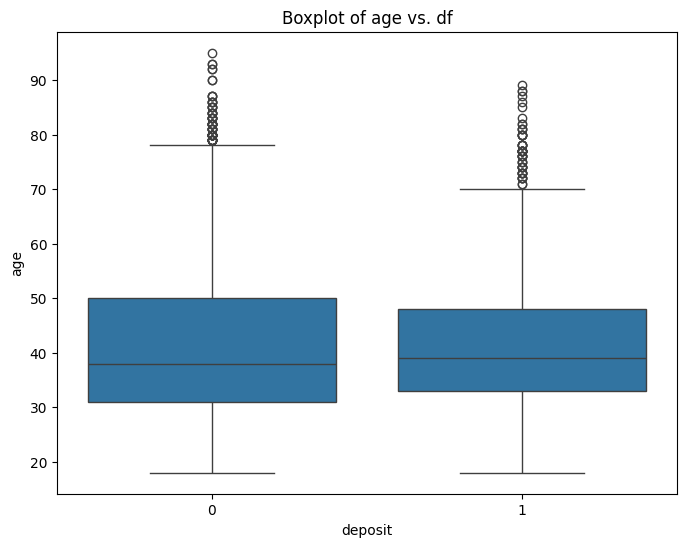

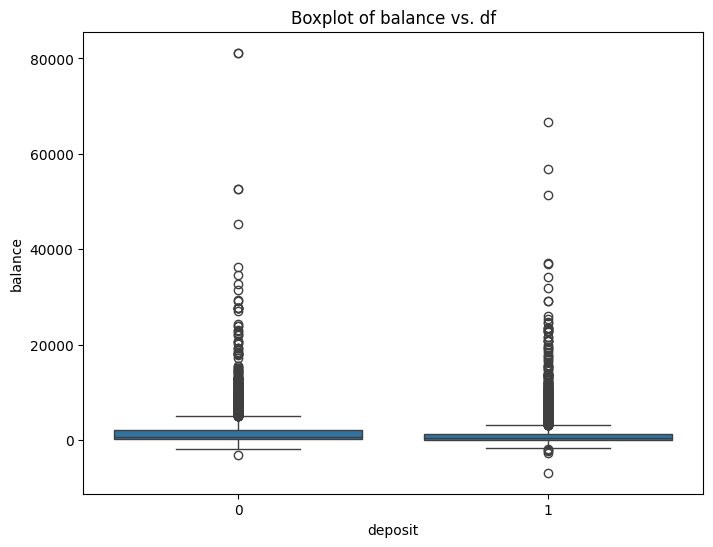

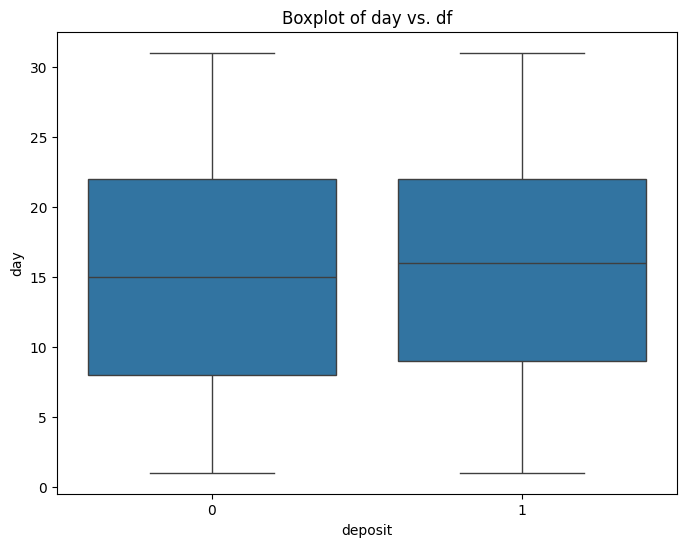

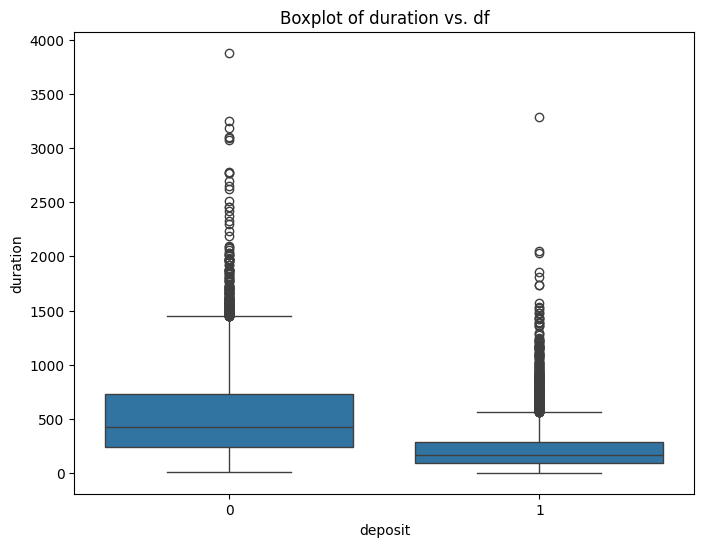

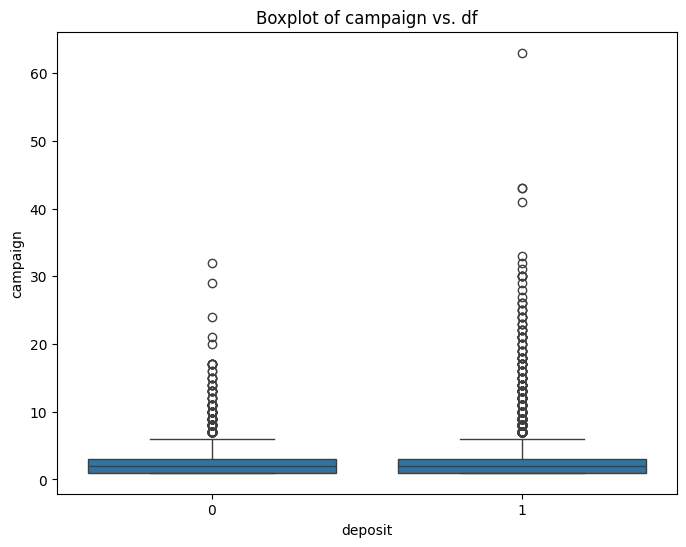

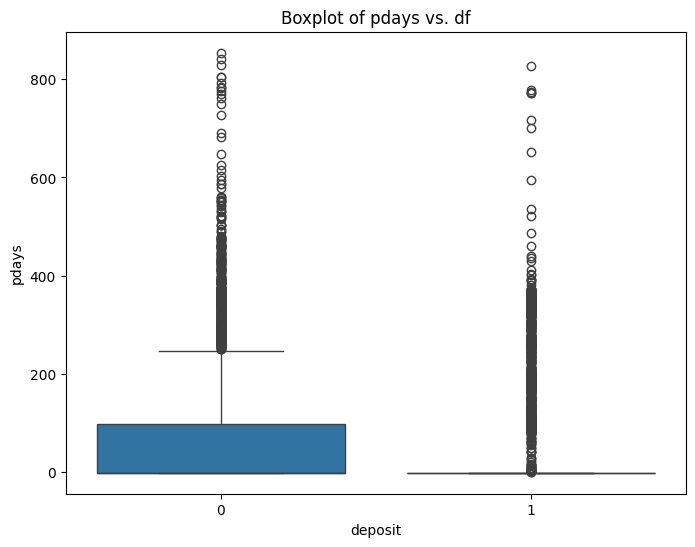

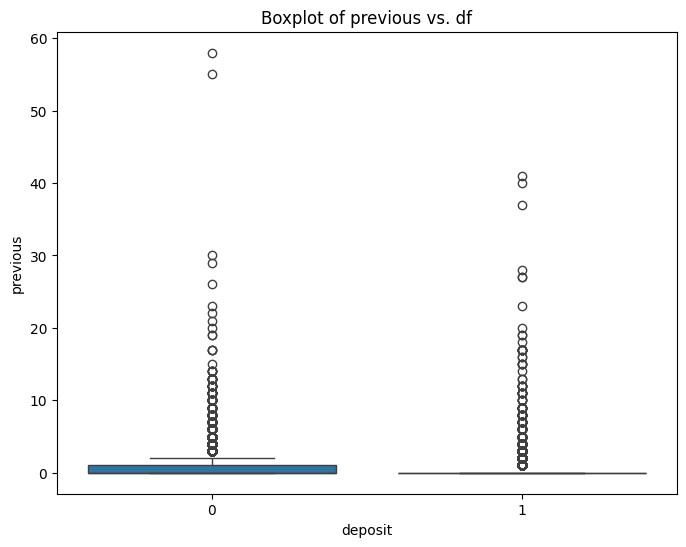

In [27]:
#boxplot for numerical columbs against target variable
for col in numerical_cols:
  plt.figure(figsize=(8,6))
  sns.boxplot(x='deposit', y=col, data= df)
  plt.title(f'Boxplot of {col} vs. df')
  plt.xlabel('deposit')
  plt.ylabel(col)
  plt.show()

In [28]:
#unique values in each col
for col in df.columns:
  print(f'{col} has {df[col].nunique()} categories\n')

age has 76 categories

job has 12 categories

marital has 3 categories

education has 4 categories

default has 2 categories

balance has 3805 categories

housing has 2 categories

loan has 2 categories

contact has 3 categories

day has 31 categories

month has 12 categories

duration has 1428 categories

campaign has 36 categories

pdays has 472 categories

previous has 34 categories

poutcome has 4 categories

deposit has 2 categories



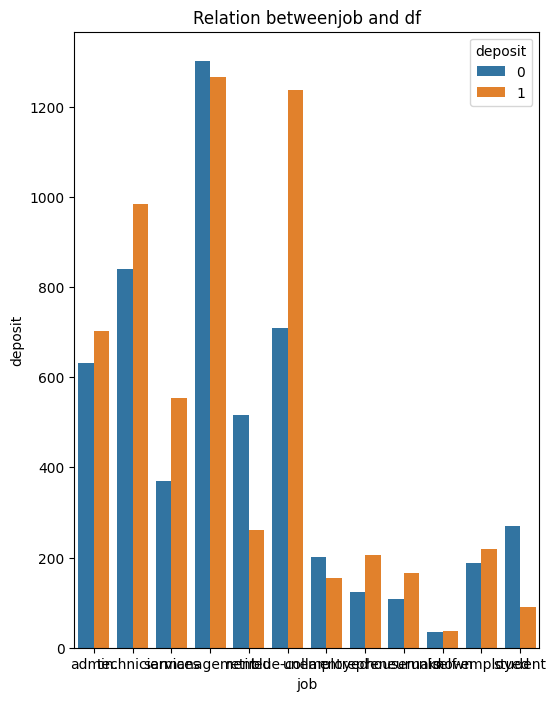

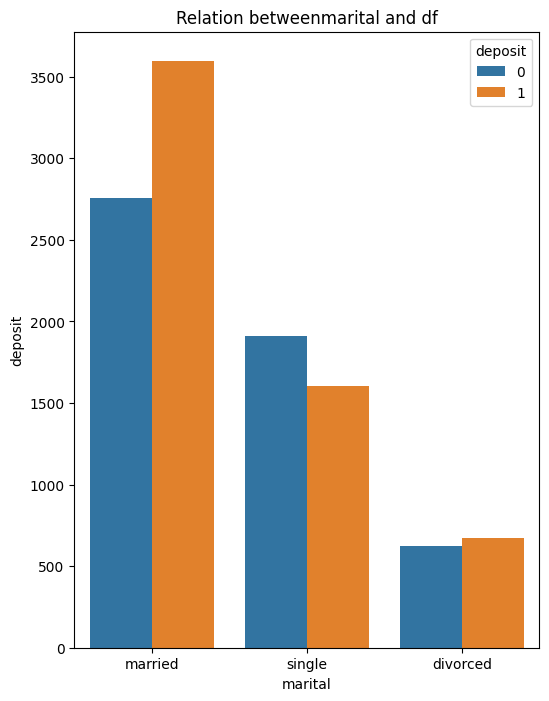

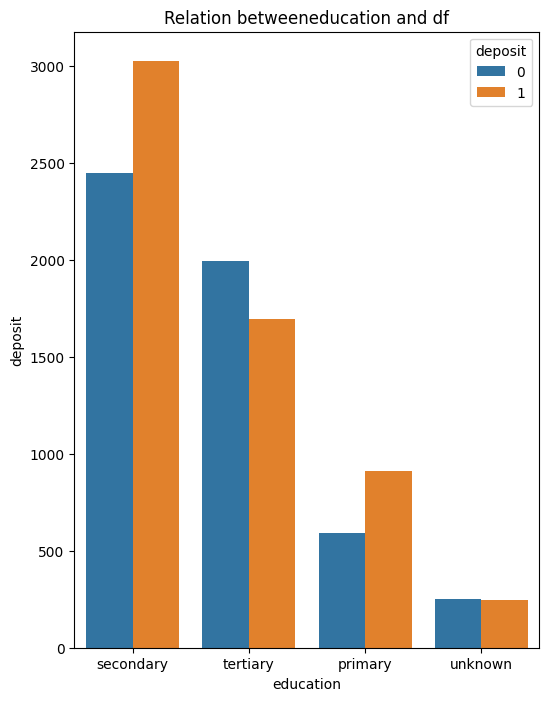

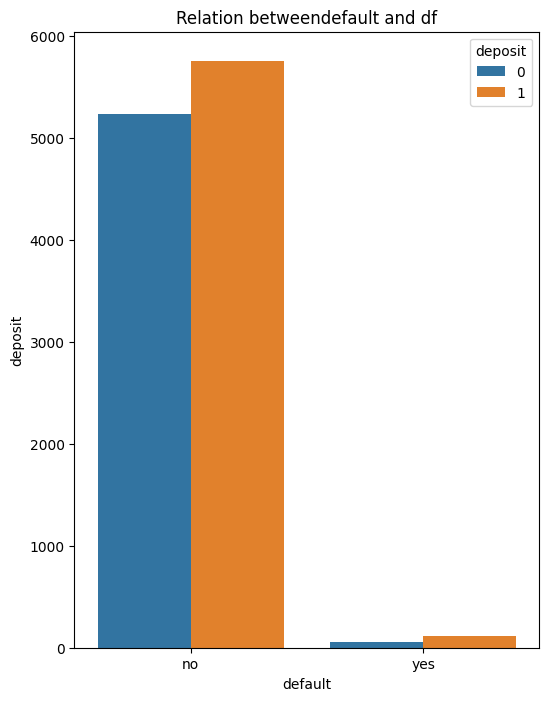

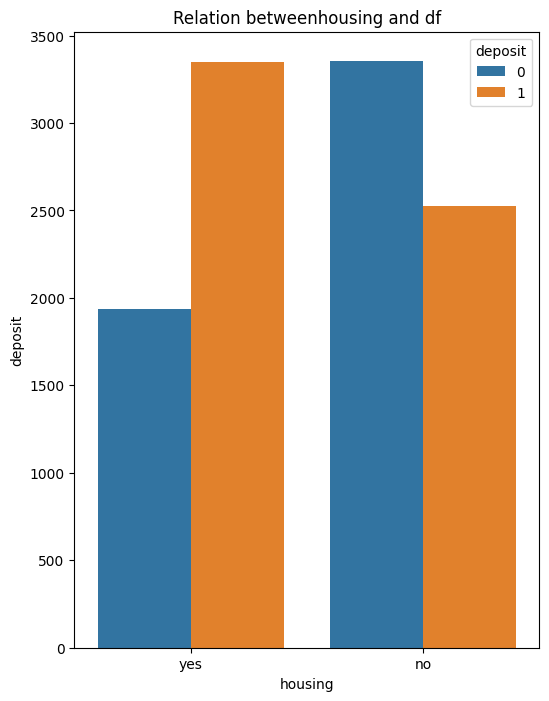

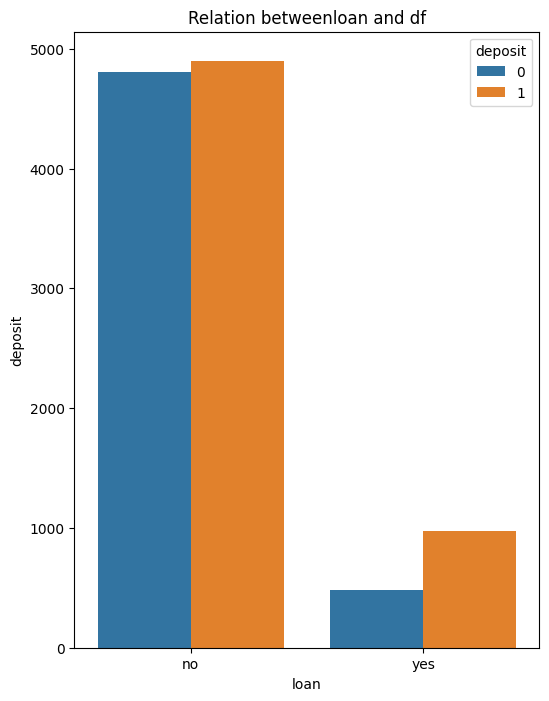

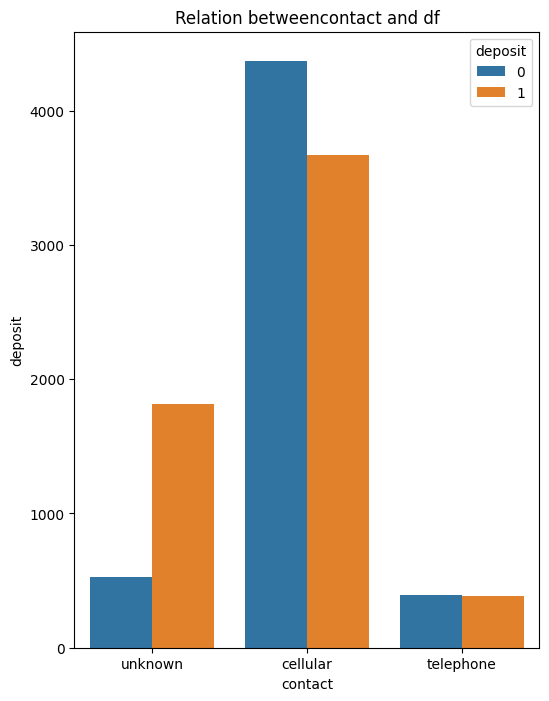

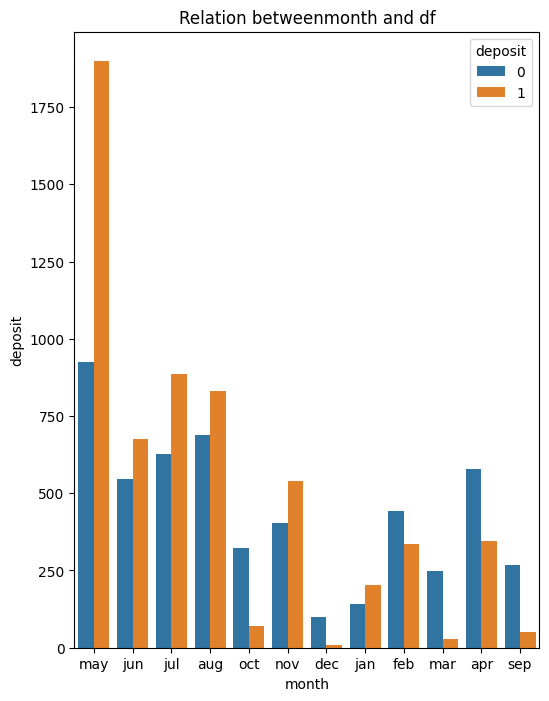

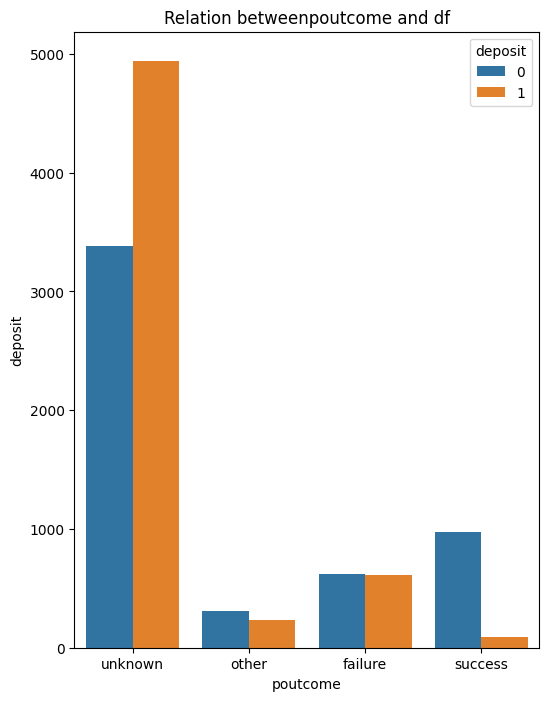

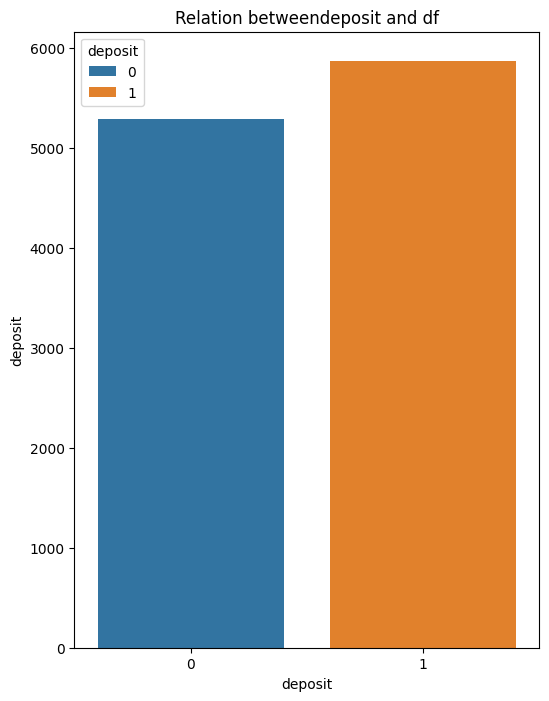

In [29]:
#relationship between categorical column and target column

for col in categorical_cols:
  plt.figure(figsize=(6,8))
  sns.countplot(x=col, hue='deposit', data=df)
  plt.title(f'Relation between{col} and df')
  plt.xlabel(col)
  plt.ylabel('deposit')
  plt.show()

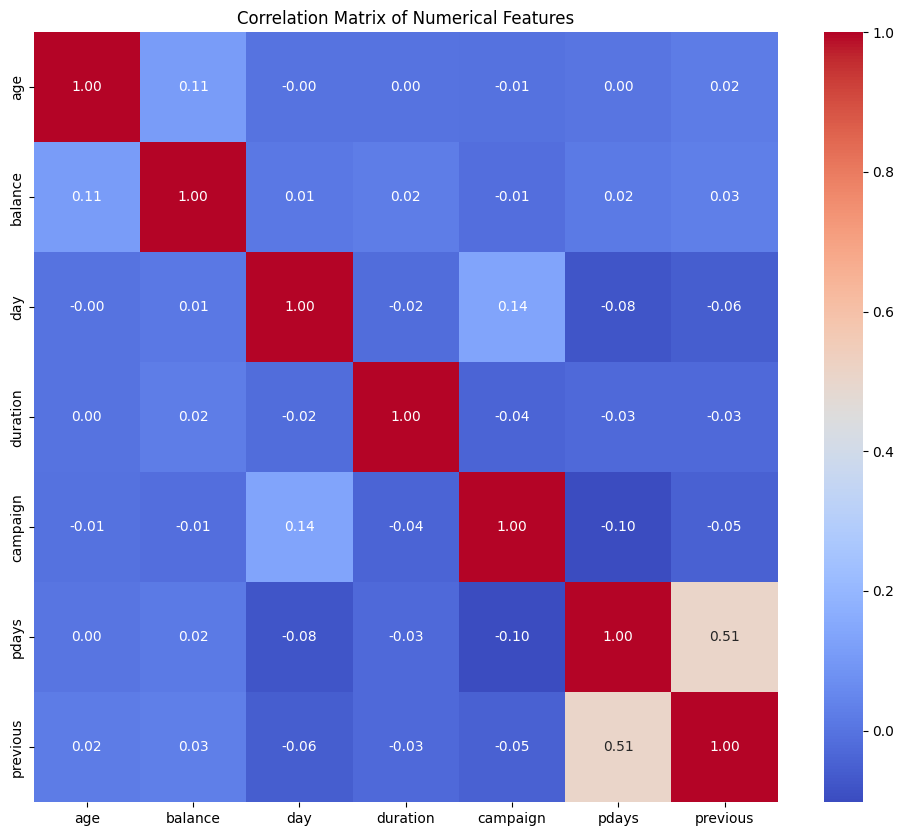

In [30]:
# Corelation matrix of (Numerical features)
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [31]:
###################################################################################################################################################################################################################

# Encoding categorical variables
label_encoder = LabelEncoder()
for col in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']:
    df[col] = label_encoder.fit_transform(df[col])

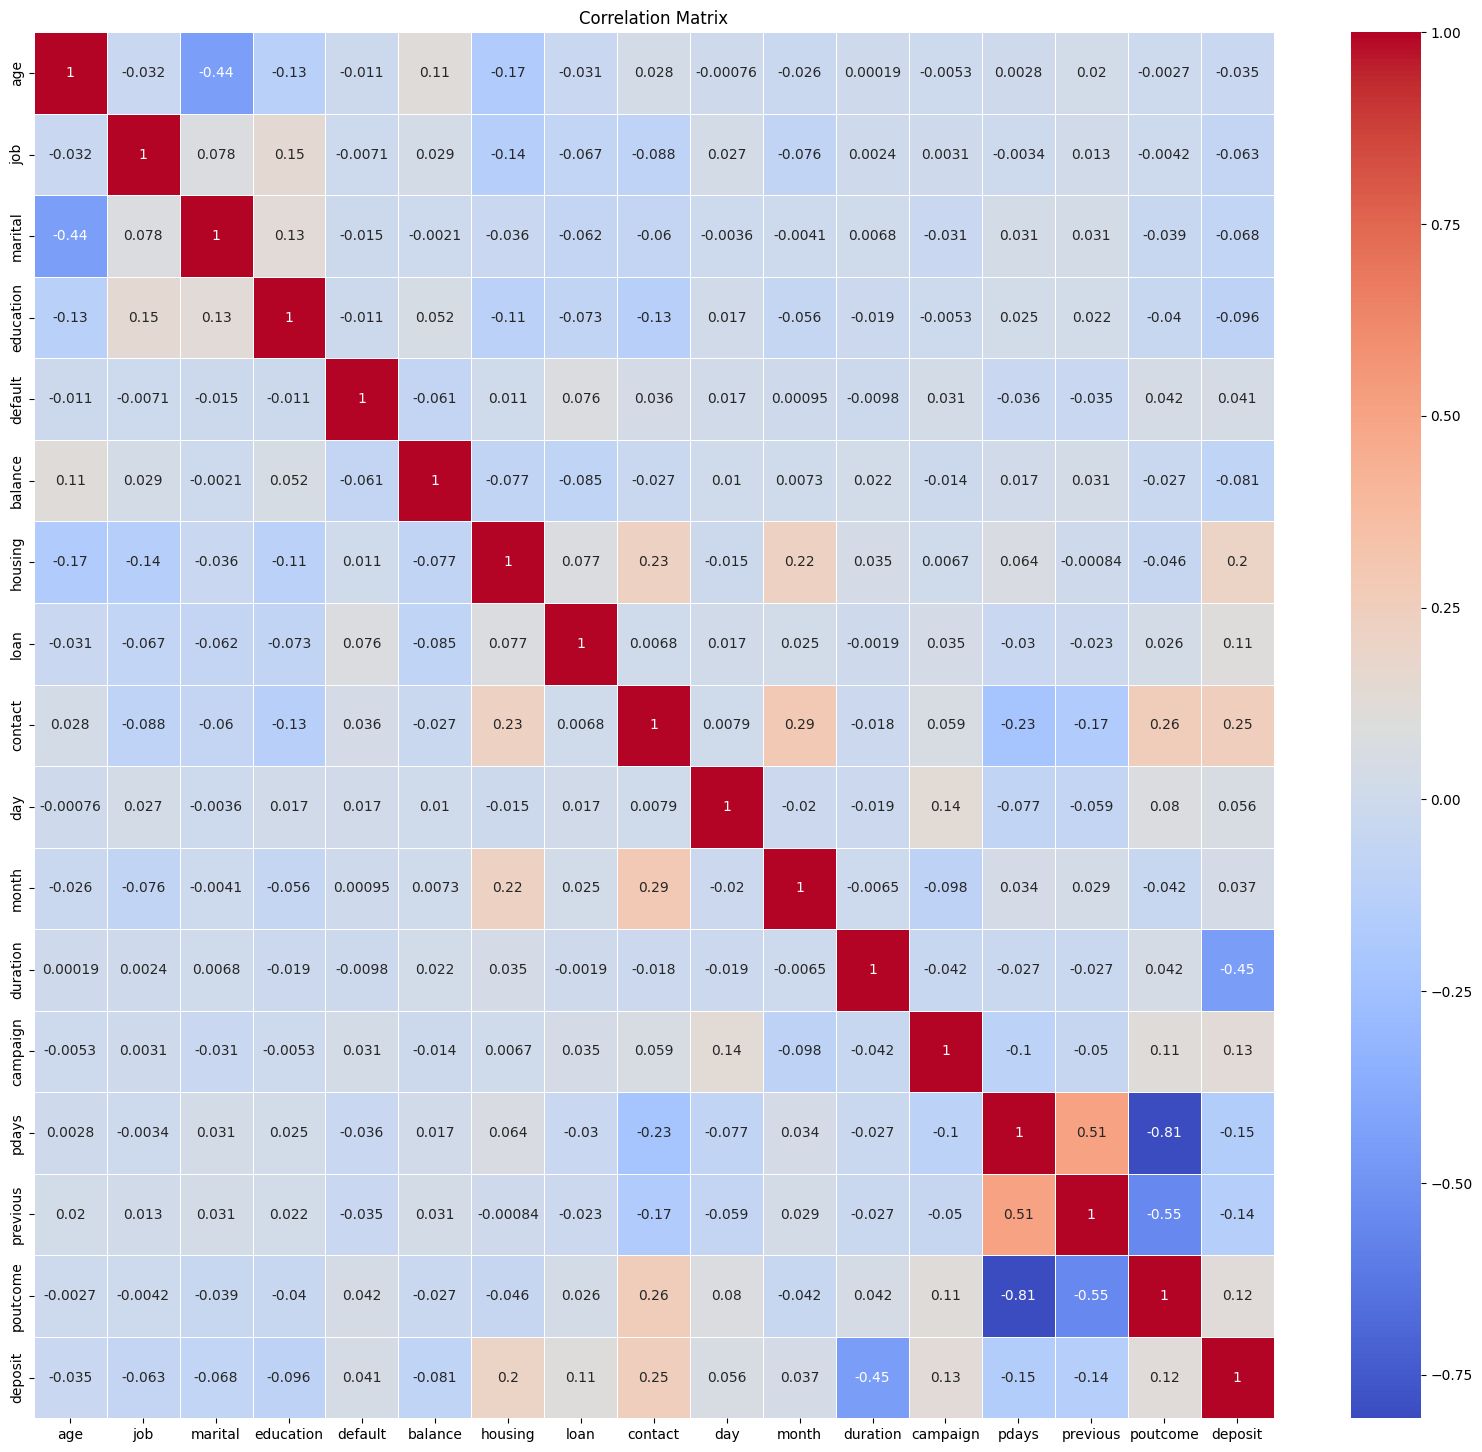

In [32]:
#correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(20,18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [33]:
# Separate features and target
X = df.drop(columns=['deposit'])
y = df['deposit']

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
# Dictionary to store results
results = {}

In [37]:
# Step 2: Applying Classification Models

# Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
results['Logistic Regression'] = {
    "accuracy": accuracy_score(y_test, y_pred_logistic),
    "precision": precision_score(y_test, y_pred_logistic),
    "recall": recall_score(y_test, y_pred_logistic),
    "f1_score": f1_score(y_test, y_pred_logistic)
}

In [38]:
# Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
results['Decision Tree'] = {
    "accuracy": accuracy_score(y_test, y_pred_tree),
    "precision": precision_score(y_test, y_pred_tree),
    "recall": recall_score(y_test, y_pred_tree),
    "f1_score": f1_score(y_test, y_pred_tree)
}

In [39]:
# Random Forest Classifier
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)
results['Random Forest'] = {
    "accuracy": accuracy_score(y_test, y_pred_forest),
    "precision": precision_score(y_test, y_pred_forest),
    "recall": recall_score(y_test, y_pred_forest),
    "f1_score": f1_score(y_test, y_pred_forest)
}

In [40]:
# Display results
results

{'Logistic Regression': {'accuracy': 0.7882950134368468,
  'precision': np.float64(0.7805540467137425),
  'recall': np.float64(0.8249138920780712),
  'f1_score': np.float64(0.8021211275467486)},
 'Decision Tree': {'accuracy': 0.7832188713048671,
  'precision': np.float64(0.786358511837655),
  'recall': np.float64(0.8008036739380023),
  'f1_score': np.float64(0.7935153583617748)},
 'Random Forest': {'accuracy': 0.8405494177366378,
  'precision': np.float64(0.8700980392156863),
  'recall': np.float64(0.8151549942594719),
  'f1_score': np.float64(0.8417308832246592)}}

In [41]:
##############################################################################################################################################################################################################

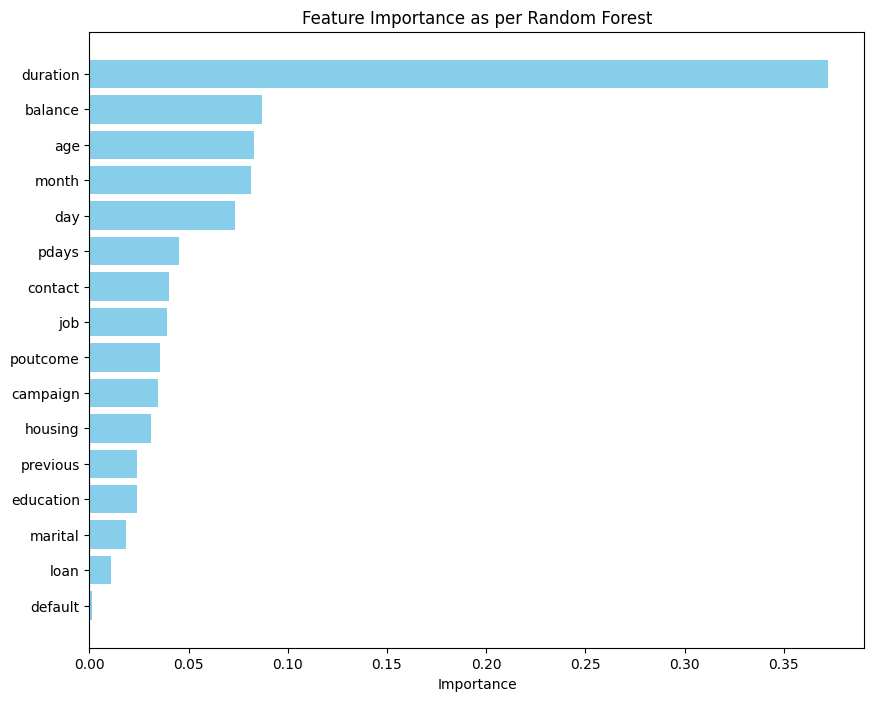

In [42]:
# Calculate feature importance using the Random Forest model
feature_importance = forest_model.feature_importances_
features = X.columns

# Create a DataFrame for better readability and sorting
feature_df = pd.DataFrame({'feature': features, 'importance': feature_importance})
feature_df = feature_df.sort_values(by='importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_df['feature'], feature_df['importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance as per Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [43]:
# Display sorted features
feature_df

,feature,importance
11,duration,0.372126
5,balance,0.087188
0,age,0.082762
10,month,0.081314
9,day,0.073170
13,pdays,0.045241
8,contact,0.040006
1,job,0.039093
15,poutcome,0.035735
12,campaign,0.034359


In [44]:
# Selecting top features based on importance
top_features = feature_df['feature'].head(10).tolist()  # Top 10 important features

In [45]:
# Update X with selected features
X_top = df[top_features]
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y, test_size=0.3, random_state=42)

In [46]:
# Re-scale data
X_train_top = scaler.fit_transform(X_train_top)
X_test_top = scaler.transform(X_test_top)

In [47]:
# Dictionary to store refined model results
refined_results = {}

In [48]:
# Logistic Regression on refined features
logistic_model_top = LogisticRegression(random_state=42)
logistic_model_top.fit(X_train_top, y_train_top)
y_pred_logistic_top = logistic_model_top.predict(X_test_top)
refined_results['Logistic Regression'] = {
    "accuracy": accuracy_score(y_test_top, y_pred_logistic_top),
    "precision": precision_score(y_test_top, y_pred_logistic_top),
    "recall": recall_score(y_test_top, y_pred_logistic_top),
    "f1_score": f1_score(y_test_top, y_pred_logistic_top)
}

In [49]:
# Decision Tree on refined features
tree_model_top = DecisionTreeClassifier(random_state=42)
tree_model_top.fit(X_train_top, y_train_top)
y_pred_tree_top = tree_model_top.predict(X_test_top)
refined_results['Decision Tree'] = {
    "accuracy": accuracy_score(y_test_top, y_pred_tree_top),
    "precision": precision_score(y_test_top, y_pred_tree_top),
    "recall": recall_score(y_test_top, y_pred_tree_top),
    "f1_score": f1_score(y_test_top, y_pred_tree_top)
}

In [50]:
# Random Forest on refined features
forest_model_top = RandomForestClassifier(random_state=42)
forest_model_top.fit(X_train_top, y_train_top)
y_pred_forest_top = forest_model_top.predict(X_test_top)
refined_results['Random Forest'] = {
    "accuracy": accuracy_score(y_test_top, y_pred_forest_top),
    "precision": precision_score(y_test_top, y_pred_forest_top),
    "recall": recall_score(y_test_top, y_pred_forest_top),
    "f1_score": f1_score(y_test_top, y_pred_forest_top)
}

In [51]:
# Display refined results
refined_results

{'Logistic Regression': {'accuracy': 0.754255001492983,
  'precision': np.float64(0.7374677002583979),
  'recall': np.float64(0.8191733639494834),
  'f1_score': np.float64(0.7761762306227903)},
 'Decision Tree': {'accuracy': 0.7862048372648551,
  'precision': np.float64(0.7895033860045146),
  'recall': np.float64(0.8030998851894374),
  'f1_score': np.float64(0.7962435970404098)},
 'Random Forest': {'accuracy': 0.8420424007166318,
  'precision': np.float64(0.8723143032535298),
  'recall': np.float64(0.8157290470723306),
  'f1_score': np.float64(0.843073272026105)}}

In [52]:
# Display the prepared data after encoding and scaling as part of the Data Preparation step
prepared_data = pd.DataFrame(X_train, columns=X.columns)
prepared_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.330255,1.401408,-0.325719,-0.392046,-0.120597,-0.182470,1.066318,-0.392507,-0.595139,-0.784541,-0.151993,2.608028,-0.550775,-0.472571,-0.375762,0.513645
1,-0.610758,1.401408,1.272800,0.941457,-0.120597,-0.190245,1.066318,-0.392507,-0.595139,-0.309441,-1.720304,0.980204,-0.550775,-0.472571,-0.375762,0.513645
2,-0.020015,-1.089948,1.272800,-0.392046,-0.120597,-0.454565,1.066318,-0.392507,1.856007,-1.734742,-0.151993,0.315195,2.387568,-0.472571,-0.375762,0.513645
3,0.401944,1.401408,1.272800,0.941457,-0.120597,0.894713,-0.937806,-0.392507,-0.595139,0.284434,-1.406642,0.387479,1.652982,-0.472571,-0.375762,0.513645
4,-1.117109,2.024247,1.272800,-0.392046,-0.120597,0.910572,-0.937806,-0.392507,-0.595139,1.472184,-0.465656,1.153684,-0.550775,-0.472571,-0.375762,0.513645


In [53]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for optimization
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [54]:
# Initialize Grid Search with Random Forest
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='f1')
grid_search.fit(X_train_top, y_train_top)

# Display the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best F1 Score from Grid Search:", best_score)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best F1 Score from Grid Search: 0.8501113404648841


In [55]:
# Predictions from refined models (assuming you've already trained and optimized them)
y_pred_logistic_top = logistic_model_top.predict(X_test_top)
y_pred_tree_top = tree_model_top.predict(X_test_top)
y_pred_forest_top = forest_model_top.predict(X_test_top)

# If you have optimized the Random Forest using GridSearchCV
y_pred_optimized_forest = grid_search.best_estimator_.predict(X_test_top)

# Collecting metrics for each model
model_comparison = {
    "Logistic Regression": {
        "accuracy": accuracy_score(y_test_top, y_pred_logistic_top),
        "precision": precision_score(y_test_top, y_pred_logistic_top),
        "recall": recall_score(y_test_top, y_pred_logistic_top),
        "f1_score": f1_score(y_test_top, y_pred_logistic_top),
    },
    "Decision Tree": {
        "accuracy": accuracy_score(y_test_top, y_pred_tree_top),
        "precision": precision_score(y_test_top, y_pred_tree_top),
        "recall": recall_score(y_test_top, y_pred_tree_top),
        "f1_score": f1_score(y_test_top, y_pred_tree_top),
    },
    "Random Forest": {
        "accuracy": accuracy_score(y_test_top, y_pred_forest_top),
        "precision": precision_score(y_test_top, y_pred_forest_top),
        "recall": recall_score(y_test_top, y_pred_forest_top),
        "f1_score": f1_score(y_test_top, y_pred_forest_top),
    },
    "Optimized Random Forest": {
        "accuracy": accuracy_score(y_test_top, y_pred_optimized_forest),
        "precision": precision_score(y_test_top, y_pred_optimized_forest),
        "recall": recall_score(y_test_top, y_pred_optimized_forest),
        "f1_score": f1_score(y_test_top, y_pred_optimized_forest),
    },
}

# Convert the results dictionary to a DataFrame for a tabular display
comparison_df = pd.DataFrame(model_comparison).T
print(comparison_df)


                         accuracy  precision    recall  f1_score
Logistic Regression      0.754255   0.737468  0.819173  0.776176
Decision Tree            0.786205   0.789503  0.803100  0.796244
Random Forest            0.842042   0.872314  0.815729  0.843073
Optimized Random Forest  0.845028   0.875845  0.818025  0.845948
